In [ ]:
# Student Performance Predictor

This project aims to predict whether a student will pass or fail based on various socio-economic and academic features using machine learning models.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv("student-mat.csv")
df.head()


,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                               --------------  ----- 
 0   school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64

In [5]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [7]:
print(df.columns)


Index(['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3'], dtype='object')


In [9]:
df = pd.read_csv('student-mat.csv', delimiter=';')


In [10]:
# Create 'pass' column: '1' for G3 > 10 and '0' otherwise
df['pass'] = (df['G3'] > 10).astype(int)

# Drop 'G3' column as it's now used for 'pass' column
df = df.drop(columns=['G3'])

# Display the first few rows to check the new column
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,0


In [11]:
X = df.drop('pass', axis=1)
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
                       'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                       'internet', 'romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the binary categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Alternatively, for multi-class categorical columns, you can use pd.get_dummies() to perform OneHotEncoding:
df = pd.get_dummies(df, drop_first=True)

# Check the changes
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,pass
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,0
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,0


In [14]:
X = df.drop('pass', axis=1)
y = df['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Check the accuracy and performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:")
print(roc_auc_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       0.93      0.98      0.95        41

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79

Confusion Matrix:
[[35  3]
 [ 1 40]]
ROC AUC Score:
0.9483311938382541


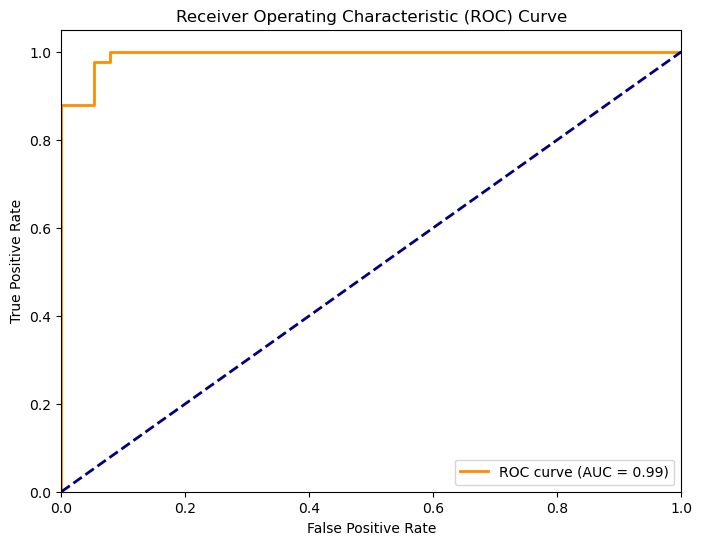

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for class 1
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


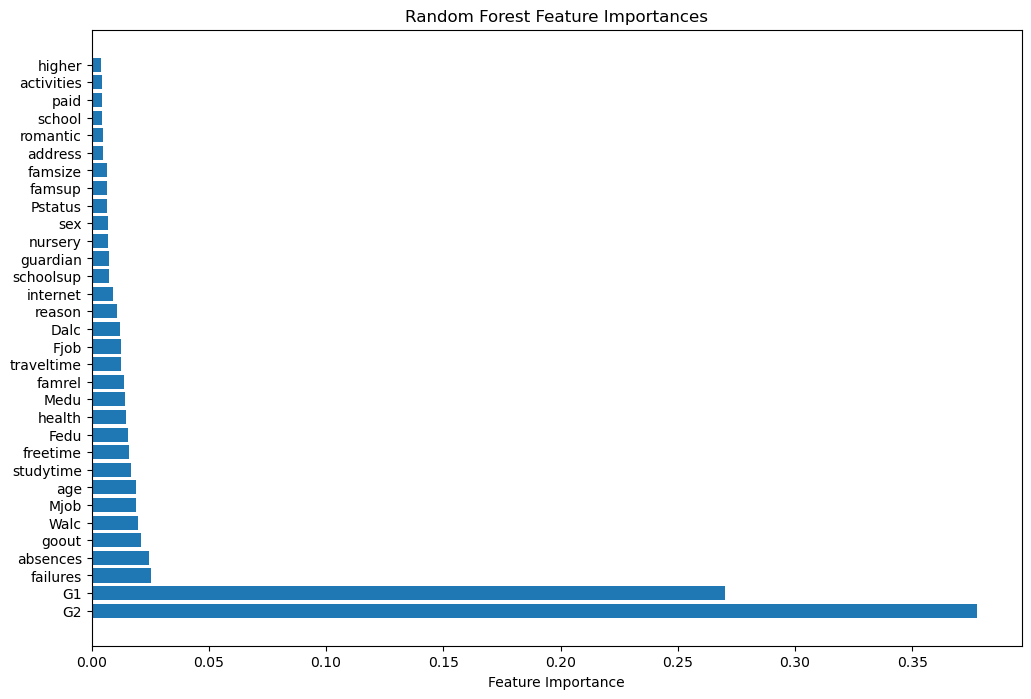

In [16]:
# Plot feature importances
import numpy as np

features = X.columns
importances = model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), features[indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()


In [17]:
import joblib
joblib.dump(model, 'student_performance_predictor_model.pkl')


['student_performance_predictor_model.pkl']